In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("WineQT.csv")

In [4]:
df.sort_values(by="quality",ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
197,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8,278
349,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,495
1030,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8,1449
190,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8,267
1104,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,517
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,1299
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,459
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,1505


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.isna().values.any()

False

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>,
        <AxesSubplot: title={'center': 'residual sugar'}>],
       [<AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>],
       [<AxesSubplot: title={'center': 'pH'}>,
        <AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>],
       [<AxesSubplot: title={'center': 'Id'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

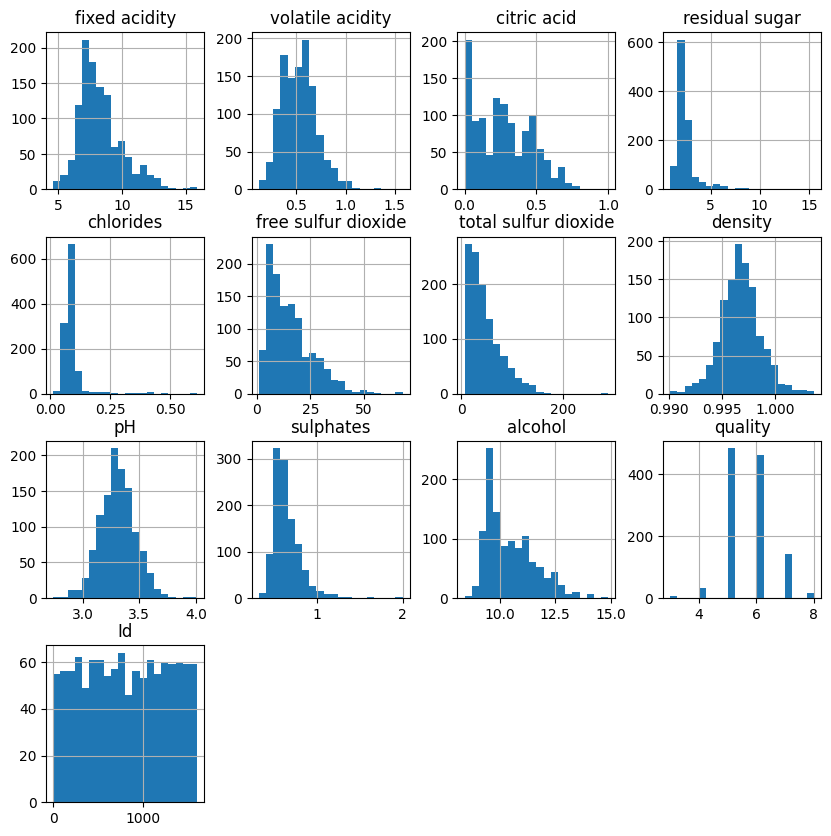

In [9]:
df.hist(bins=20,figsize=(10,10))

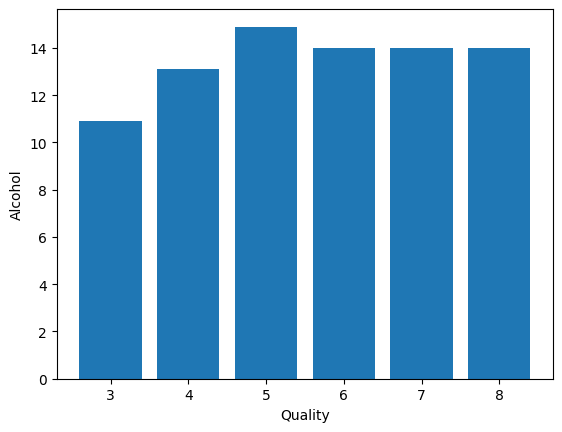

In [10]:
plt.bar(df["quality"],df["alcohol"])
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.show()


In [11]:
for column in df.columns:
    if df[column].dtype =="object":
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            # Handle potential conversion errors (e.g., log the column name)
            print(f"Failed to convert column {column} to numeric")


In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


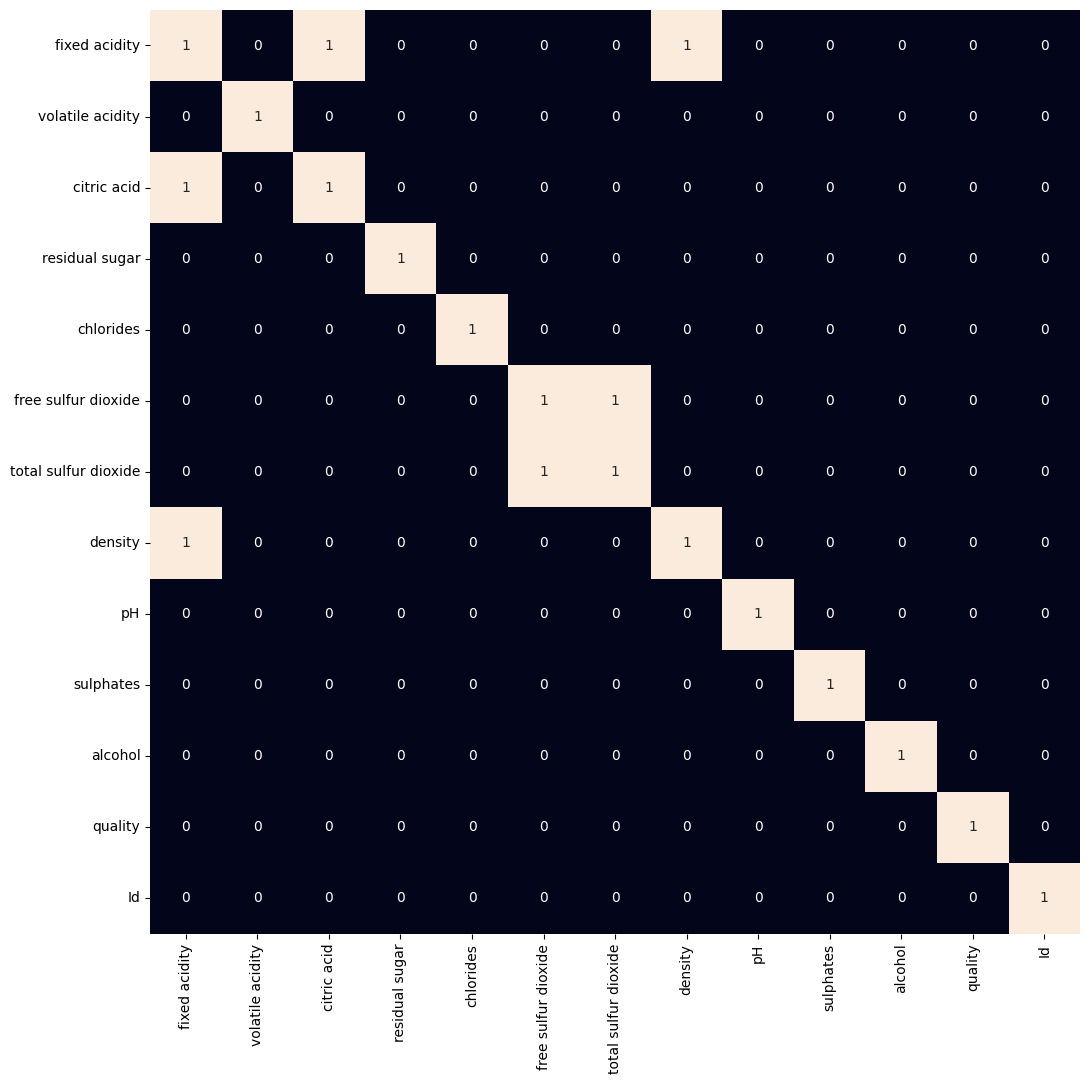

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.6, annot=True, cbar=False)
plt.show()


In [24]:
df = df.drop(["fixed acidity", "total sulfur dioxide"],axis=1)

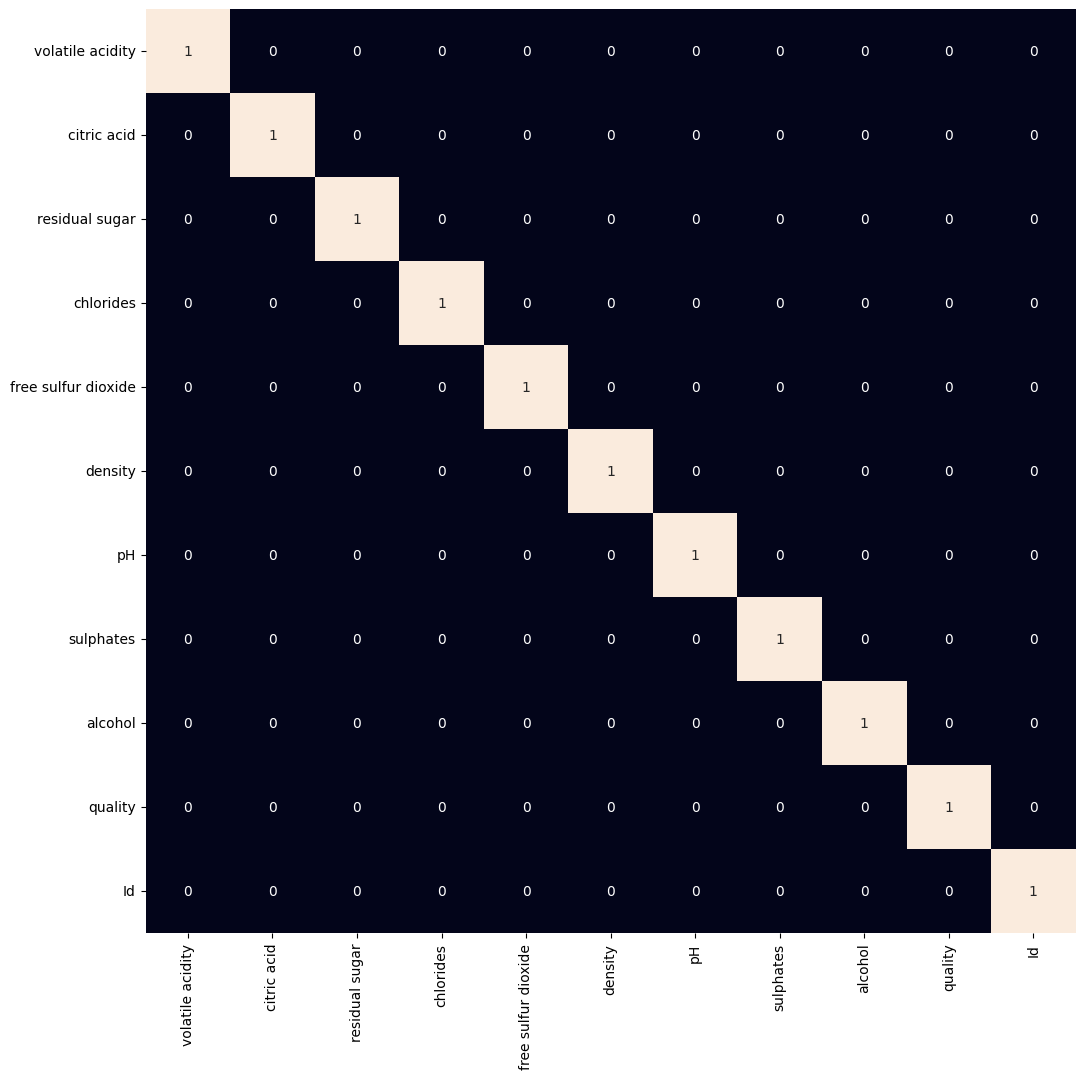

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.6, annot=True, cbar=False)
plt.show()




In [29]:
df = df.drop("Id",axis=1)

In [30]:
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1138,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6


In [34]:
for i in df.quality:
    if i>=5:
        df["bool quality"] = 1
    else:
        df["bool quality"] = 0


In [35]:
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bool quality
0,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,1
1,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,1
2,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,1
3,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,1
4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1
1139,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,1
1140,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,1
1141,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1


In [51]:
features = df.drop(['quality', 'bool quality'], axis=1)

features = features.fillna(features.mean())
target = df[["bool quality"]]

x_train,y_train,x_test,y_test = train_test_split(features,target,test_size=0.1,random_state=42)

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
x_train.shape,x_test.shape
# df.info()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bool quality
Feature names seen at fit time, yet now missing:
- alcohol
- chlorides
- citric acid
- density
- free sulfur dioxide
- ...
